In [1]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
neq = 10000

In [3]:
wkdir = os.getcwd()
datadir = wkdir + "/data/"

In [4]:
all_data_files = []
for datafile in os.listdir(datadir):
    if datafile.endswith('.csv'):
        all_data_files.append(datafile)

In [5]:
all_data_files

['ising_MC_T_1.200_J_1.000_L_10.csv',
 'ising_MC_T_2.600_J_1.000_L_10.csv',
 'ising_MC_T_3.600_J_1.000_L_10.csv',
 'ising_MC_T_3.400_J_1.000_L_10.csv',
 'ising_MC_T_1.400_J_1.000_L_10.csv',
 'ising_MC_T_1.600_J_1.000_L_10.csv',
 'ising_MC_T_2.200_J_1.000_L_10.csv',
 'ising_MC_T_0.800_J_1.000_L_10.csv',
 'ising_MC_T_0.200_J_1.000_L_10.csv',
 'ising_MC_T_2.800_J_1.000_L_10.csv',
 'ising_MC_T_0.600_J_1.000_L_10.csv',
 'ising_MC_T_2.400_J_1.000_L_10.csv',
 'ising_MC_T_2.000_J_1.000_L_10.csv',
 'ising_MC_T_3.200_J_1.000_L_10.csv',
 'ising_MC_T_0.400_J_1.000_L_10.csv',
 'ising_MC_T_1.800_J_1.000_L_10.csv',
 'ising_MC_T_3.000_J_1.000_L_10.csv',
 'ising_MC_T_1.000_J_1.000_L_10.csv',
 'ising_MC_T_3.800_J_1.000_L_10.csv',
 'ising_MC_T_4.000_J_1.000_L_10.csv']

In [6]:
df = pd.read_csv(datadir+all_data_files[0])
for i in range(1,len(all_data_files)):
    df2 = pd.read_csv(datadir+all_data_files[i])
    df = pd.concat([df, df2])
nulldata = df[df['T'].isna()]
print("There were "+str(len(nulldata))+" NaN entries in all data files")
#df.describe()
df = df.dropna()
df["T/J"] = df["T"]/(df["J"])
df["E/N"] = df["E"]/(df["L"]*df["L"])
df["M/N"] = df["M"]/(df["L"]*df["L"])

There were 0 NaN entries in all data files


In [7]:
nulldata

,step,E,M,T,J,L


In [8]:
df.head()

,step,E,M,T,J,L,T/J,E/N,M/N
0,0,-160.000000,-11.5,1.2,1.0,10,1.2,-1.600000,-0.115
1,1,-286.666667,-33.5,1.2,1.0,10,1.2,-2.866667,-0.335
2,2,-294.666667,-63.5,1.2,1.0,10,1.2,-2.946667,-0.635
3,3,-310.666667,-115.5,1.2,1.0,10,1.2,-3.106667,-1.155
4,4,-326.666667,-187.5,1.2,1.0,10,1.2,-3.266667,-1.875


In [9]:
df.describe()

,step,E,M,T,J,L,T/J,E/N,M/N
count,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4000000.0,4000000.0,4.000000e+06,4.000000e+06,4.000000e+06
mean,9.999950e+04,-2.905702e+02,1.163936e+06,2.100000e+00,1.0,10.0,2.100000e+00,-2.905702e+00,1.163936e+04
std,5.773503e+04,1.244053e+02,7.273440e+06,1.153256e+00,0.0,0.0,1.153256e+00,1.244053e+00,7.273440e+04
min,0.000000e+00,-4.400000e+02,-1.999783e+07,2.000000e-01,1.0,10.0,2.000000e-01,-4.400000e+00,-1.999783e+05
25%,4.999975e+04,-4.066667e+02,-4.911750e+04,1.150000e+00,1.0,10.0,1.150000e+00,-4.066667e+00,-4.911750e+02
50%,9.999950e+04,-3.396364e+02,9.190500e+03,2.100000e+00,1.0,10.0,2.100000e+00,-3.396364e+00,9.190500e+01
75%,1.499992e+05,-1.615385e+02,2.926068e+06,3.050000e+00,1.0,10.0,3.050000e+00,-1.615385e+00,2.926067e+04
max,1.999990e+05,4.700000e+01,1.999983e+07,4.000000e+00,1.0,10.0,4.000000e+00,4.700000e-01,1.999983e+05


In [10]:
means = df[df["step"]>neq].groupby(["T/J"]).mean()

In [11]:
means.head()

,step,E,M,T,J,L,E/N,M/N
T/J,,,,,,,,
0.2,105000.0,-440.000000,1.049993e+07,0.2,1.0,10.0,-4.400000,104999.285000
0.4,105000.0,-420.000000,9.822708e+06,0.4,1.0,10.0,-4.200000,98227.085000
0.6,105000.0,-413.330975,1.049995e+07,0.6,1.0,10.0,-4.133310,104999.454376
0.8,105000.0,-409.922142,-1.049884e+07,0.8,1.0,10.0,-4.099221,-104988.354639
1.0,105000.0,-407.434586,-1.049249e+07,1.0,1.0,10.0,-4.074346,-104924.907306


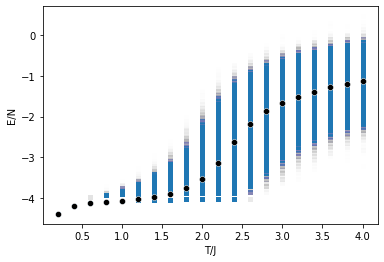

In [12]:
ax = sns.scatterplot(data = df[df["step"]>neq], x = "T/J", y = "E/N", alpha = 0.005)
ax = sns.scatterplot(data = means, x = "T/J", y = "E/N", color = "black", alpha = 1)

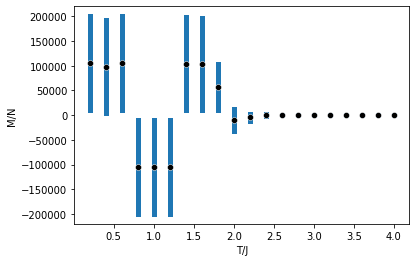

In [13]:
ax = sns.scatterplot(data = df[df["step"]>neq], x = "T/J", y = "M/N", alpha = 0.005)
ax = sns.scatterplot(data = means, x = "T/J", y = "M/N", color = "black", alpha = 1)

In [21]:
df_sparse = df[df.index % 5000 == 0]
df_sparse["M/step"] = df_sparse["M"]/df_sparse["step"]

/tmp/ipykernel_477223/1747232712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sparse["M/step"] = df_sparse["M"]/df_sparse["step"]


<AxesSubplot:xlabel='step', ylabel='M/N'>

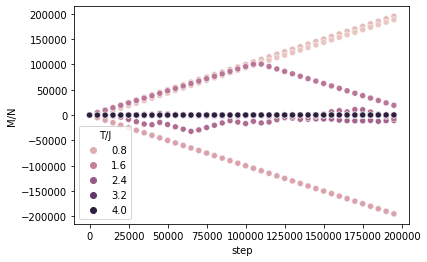

In [23]:
sns.scatterplot(data = df_sparse, x = "step", y = "M/N", hue = "T/J")